# Problem statement :
    The problem we want to solve is to create a model that can predict 
    if a loan applicant is a GOOD or BAD borrower. This will help banks and lenders make better decisions
    and reduce the risk of losing money.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\aredd\Downloads\german.data-numeric",sep='\s+')

In [3]:
df.head() # the target has 2 unique values 1 and 2 ([1 - good][2 - bad])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


# Data preprocessing

In [5]:
# Checking Null values
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
Target    0
dtype: int64

[[<AxesSubplot:title={'center':'0'}> <AxesSubplot:title={'center':'1'}>
  <AxesSubplot:title={'center':'2'}> <AxesSubplot:title={'center':'3'}>
  <AxesSubplot:title={'center':'4'}>]
 [<AxesSubplot:title={'center':'5'}> <AxesSubplot:title={'center':'6'}>
  <AxesSubplot:title={'center':'7'}> <AxesSubplot:title={'center':'8'}>
  <AxesSubplot:title={'center':'9'}>]
 [<AxesSubplot:title={'center':'10'}> <AxesSubplot:title={'center':'11'}>
  <AxesSubplot:title={'center':'12'}> <AxesSubplot:title={'center':'13'}>
  <AxesSubplot:title={'center':'14'}>]
 [<AxesSubplot:title={'center':'15'}> <AxesSubplot:title={'center':'16'}>
  <AxesSubplot:title={'center':'17'}> <AxesSubplot:title={'center':'18'}>
  <AxesSubplot:title={'center':'19'}>]
 [<AxesSubplot:title={'center':'20'}> <AxesSubplot:title={'center':'21'}>
  <AxesSubplot:title={'center':'22'}> <AxesSubplot:title={'center':'23'}>
  <AxesSubplot:title={'center':'Target'}>]]


<Figure size 2400x1200 with 0 Axes>

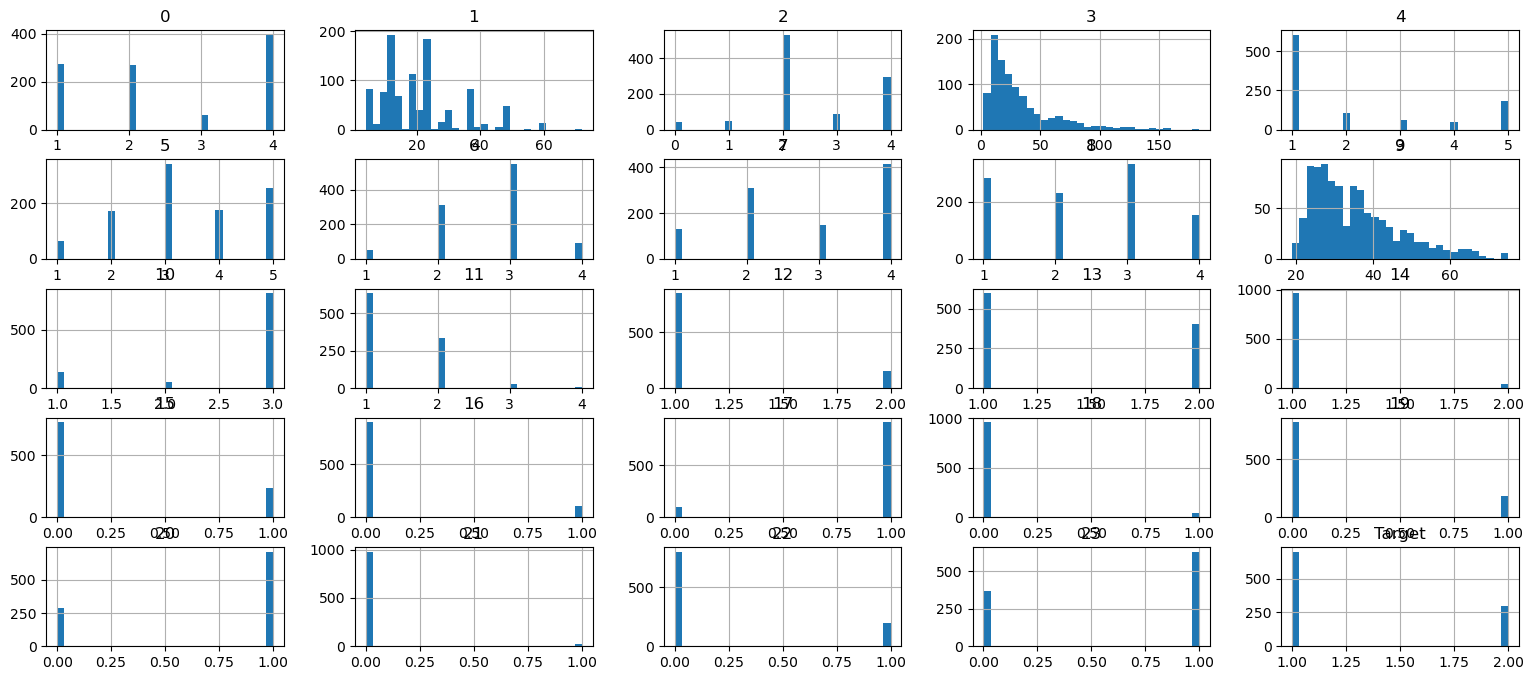

In [6]:
fig = plt.gcf()
fig.set_dpi(150)
fig.set_size_inches(16,8)


print(df.hist(figsize=(19,8),bins=30))

    There are few features where the data is skewed we should fix it before that lets check the outliers maybe that is the reason for skewed data

AxesSubplot(0.125,0.11;0.775x0.77)


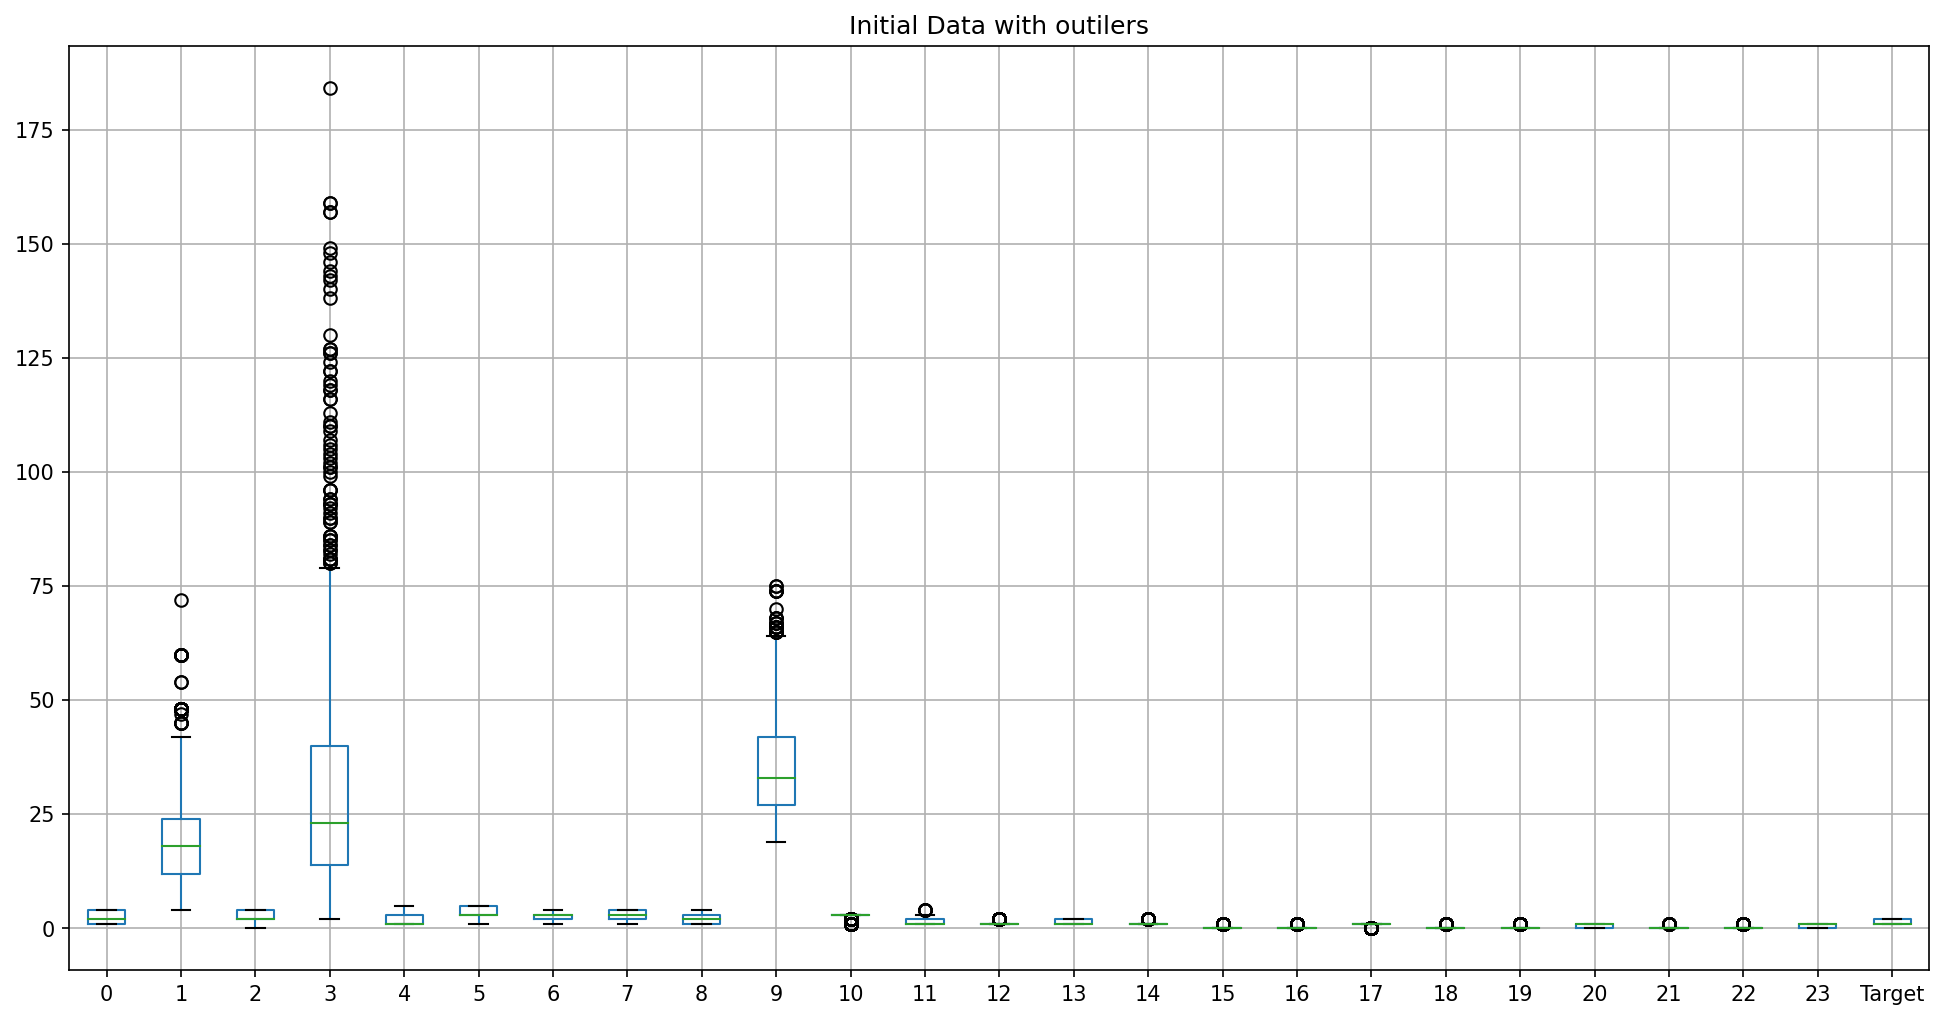

In [7]:
fig = plt.gcf()
fig.set_dpi(150)
fig.set_size_inches(16,8)
plt.title('Initial Data with outilers')
print(df.boxplot(figsize=(19,8)))

    There are a lot of outliers in the dataset we should remove them first

In [8]:
# Removing Outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# calculate the interquartile range for each feature
IQR = Q3 - Q1

# define the outlier boundaries for each feature
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

# remove outliers from the dataframe
df = df[~((df < outlier_lower) | (df > outlier_upper)).any(axis=1)]


df.reset_index(inplace=True,drop=True)

AxesSubplot(0.125,0.11;0.775x0.77)


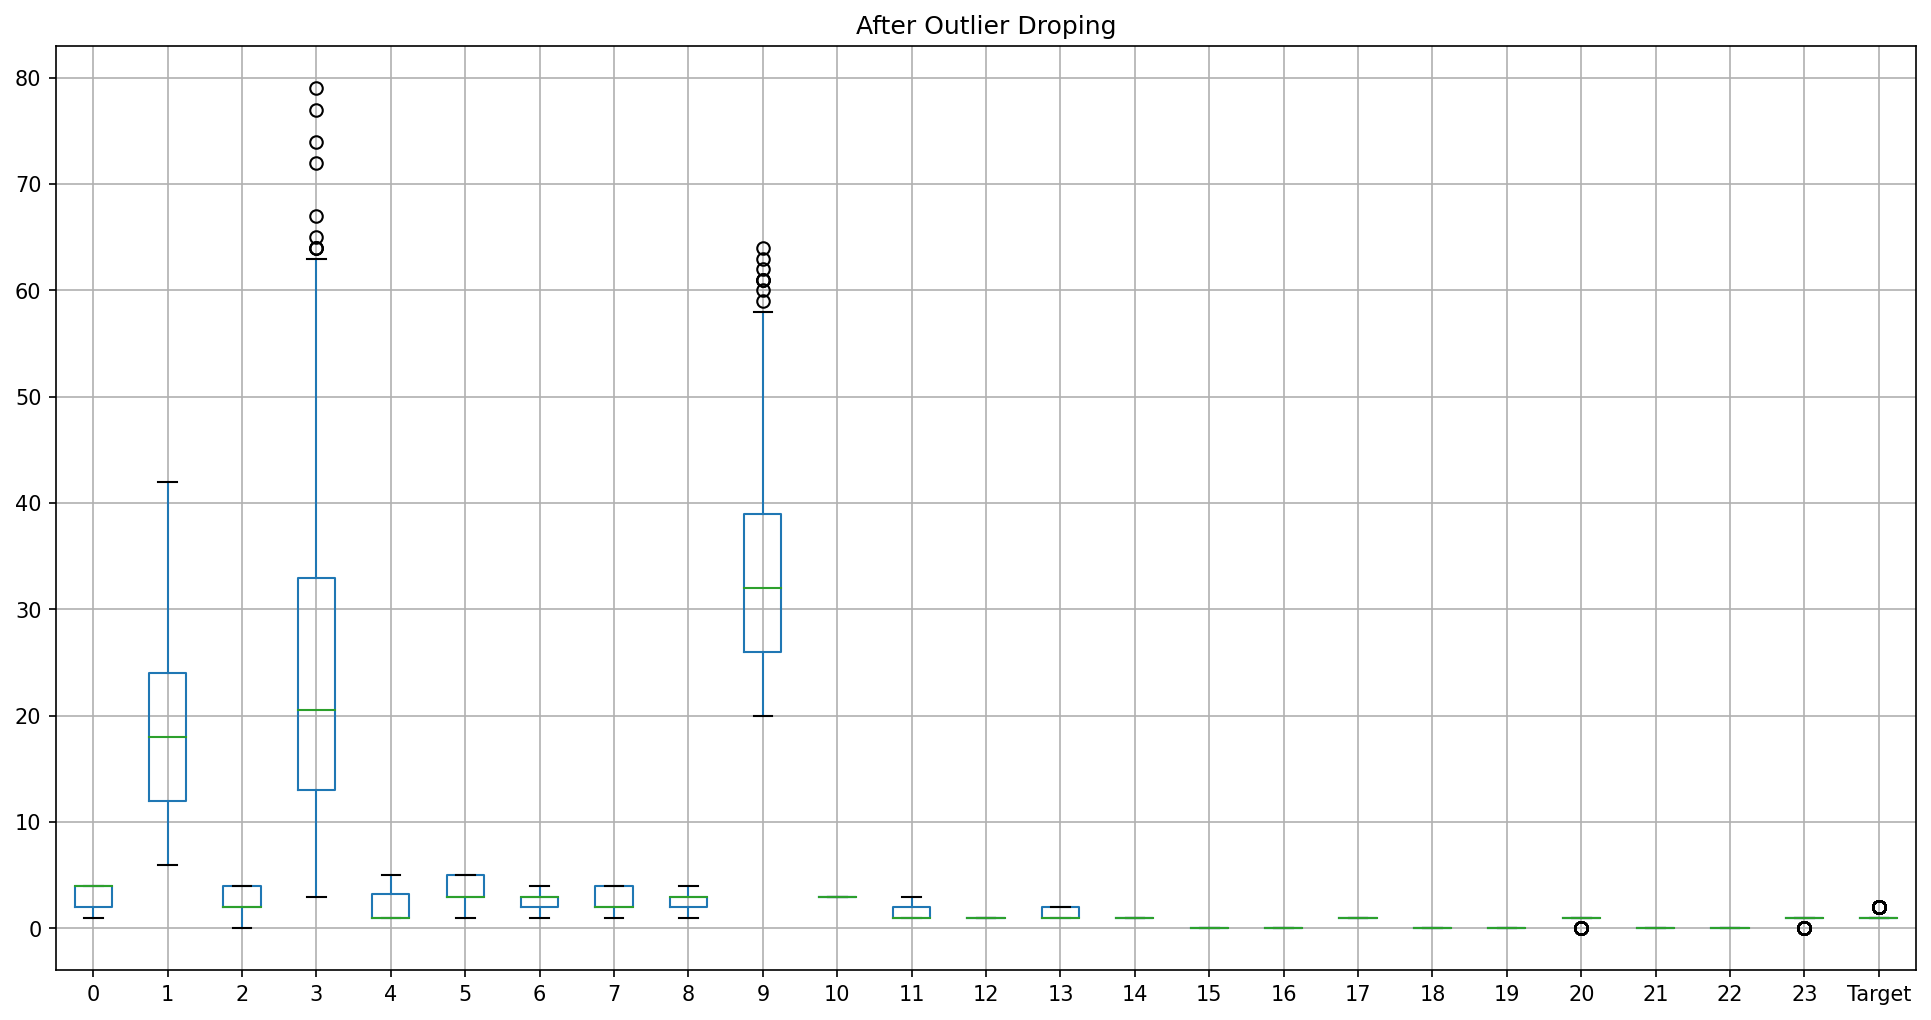

In [10]:
fig = plt.gcf()
fig.set_dpi(150)
fig.set_size_inches(16,8)
plt.title('After Outlier Droping')
print(df.boxplot(figsize=(19,8)))

    we removed almost 60 percent of the data which in our case outliers, even though we lost data but i believe in 
    perfection

In [12]:
import numpy as np


for i in range(df.shape[1]-1):
    nm = f"{i}"
    print(f"skewness of {i} is {df[nm].skew()}")

skewness of 0 is -0.4798780981464105
skewness of 1 is 0.5520490936447194
skewness of 2 is 0.014713329579385344
skewness of 3 is 1.1696594637691642
skewness of 4 is 0.917565423011314
skewness of 5 is -0.1586421544883273
skewness of 6 is -0.3382122126729955
skewness of 7 is 0.0016675069419172827
skewness of 8 is -0.09161699056532846
skewness of 9 is 1.0395375991616769
skewness of 10 is 0
skewness of 11 is 0.9329811968219508
skewness of 12 is 0
skewness of 13 is 0.45669000511233737
skewness of 14 is 0
skewness of 15 is 0
skewness of 16 is 0
skewness of 17 is 0
skewness of 18 is 0
skewness of 19 is 0
skewness of 20 is -2.879551512205802
skewness of 21 is 0
skewness of 22 is 0
skewness of 23 is -2.4976094903217088


    column number 3 and 9 are highly skewed lets apply log transformation to it

In [13]:
df['3'] = np.log(df['3'])
df['9'] = np.log(df['9'])

print(f"After all preprocessing data shape is {df.shape}")

After all preprocessing data shape is (244, 25)


# Feature Selection

<AxesSubplot:>

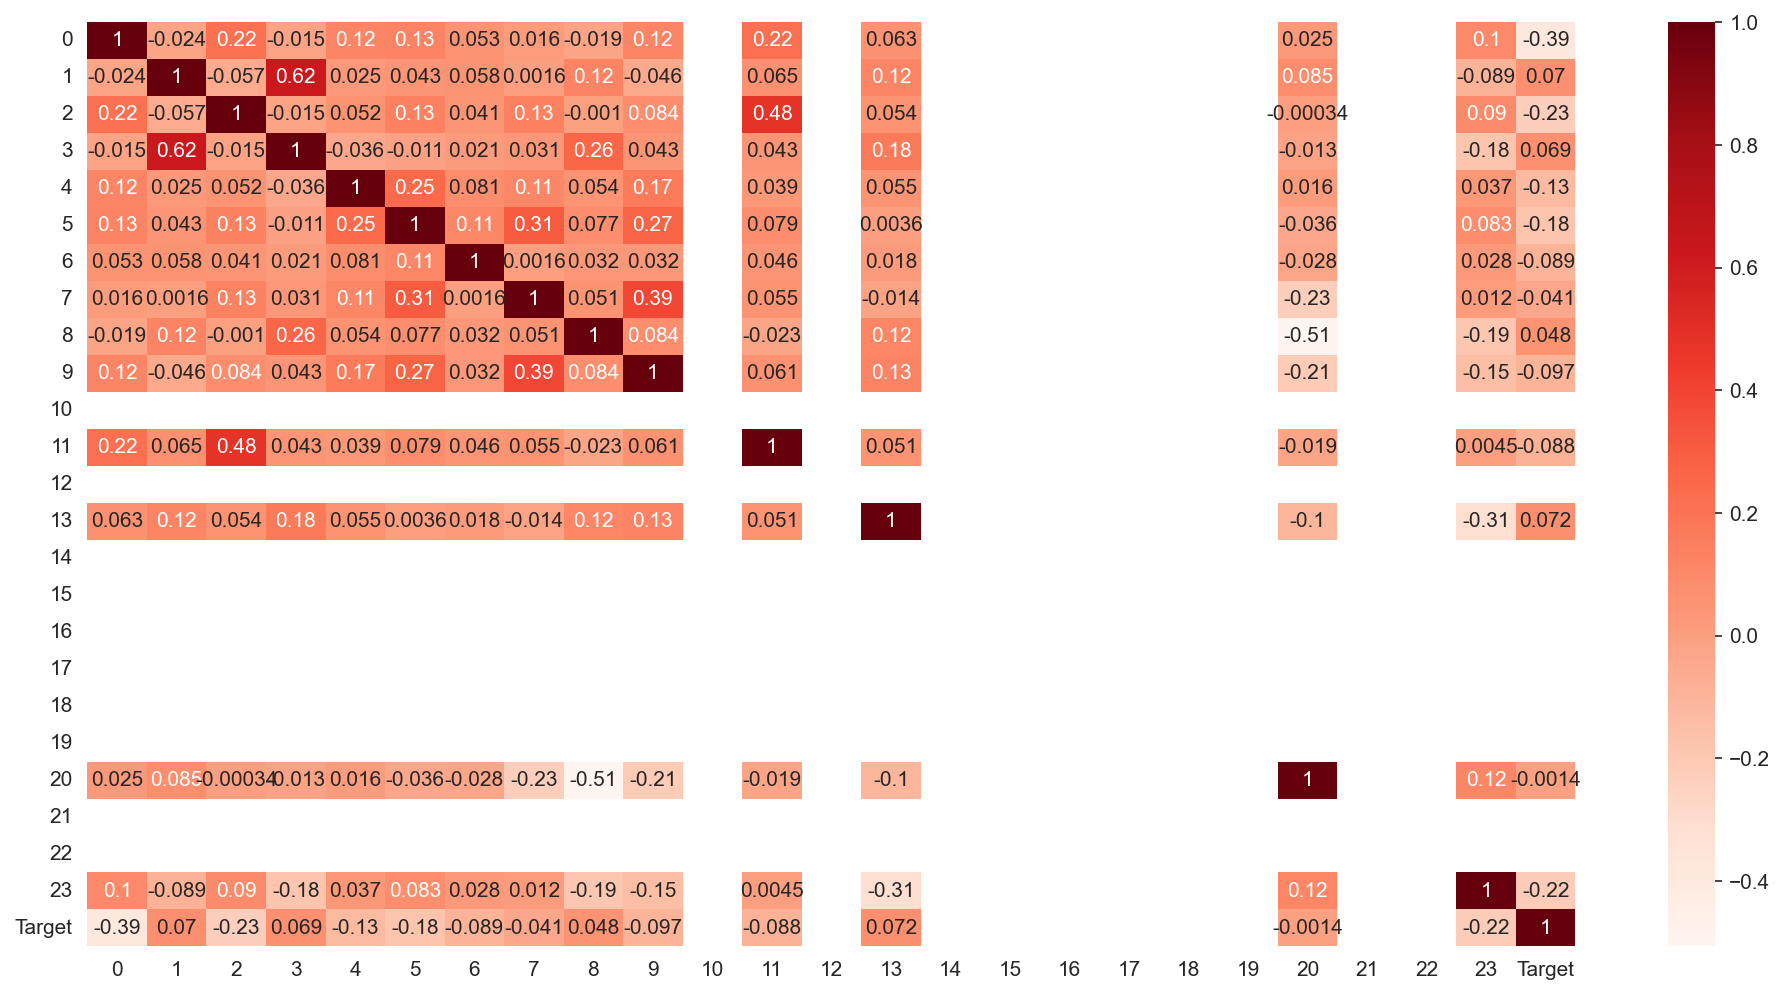

In [14]:
sns.set_style('whitegrid')
fig = plt.gcf()
fig.set_dpi(150)
fig.set_size_inches(16,8)
sns.heatmap(df.corr(),annot=True,cmap="Reds")

In [15]:
corr_matrix = df.corr()
corr_values = abs(corr_matrix)

# Select features with correlation greater than 0.5
selected_features = corr_values['Target'][corr_values['Target'] > 0.03].index.tolist()

In [16]:
selected_features

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '13', '23', 'Target']

In [17]:
df = df[selected_features]
df.reset_index(inplace=True,drop=True)

In [18]:
print(f"After Feature Selection {df.shape}")
df.sample(3)

After Feature Selection (244, 14)


,0,1,2,3,4,5,6,7,8,9,11,13,23,Target
155,4,36,2,3.496508,1,3,2,2,3,3.332205,1,2,0,2
190,3,24,4,2.564949,4,3,1,4,1,3.583519,2,2,1,1
240,3,42,0,4.143135,1,2,1,1,2,3.496508,2,1,1,1


In [19]:
df.groupby('Target').mean()

,0,1,2,3,4,5,6,7,8,9,11,13,23
Target,,,,,,,,,,,,,
1,3.169312,18.883598,2.761905,3.006084,2.285714,3.613757,2.650794,2.656085,2.375661,3.502127,1.402116,1.370370,0.925926
2,2.036364,20.436364,2.200000,3.112633,1.781818,3.109091,2.490909,2.545455,2.490909,3.437542,1.290909,1.454545,0.763636


    it is clear that features 0,1,3,5,9 contributes more for the prediction

# Model Selction

In [20]:
X = df.drop('Target',axis=1)
y = df['Target']

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

tr = []
te = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(df)):
    # Split the data into training and test sets for this fold
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    # Define the feature and target columns
    feature_cols = df.drop('Target',axis=1).columns
    target_col = 'Target'
    
    # Split the training and test data into features and targets
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Fit a linear regression model on the training data
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    score = model.score(X_test, y_test)
    score_tr = model.score(X_train, y_train)
    
    print(f"Train score Fold {fold+1} score: {score_tr}")
    print(f"Fold {fold+1} score: {score}\n")

    tr.append(score_tr)
    te.append(score)
    
print(f"Average Train {np.mean(tr)}")
print(f"Average Test {np.mean(te)}")

Train score Fold 1 score: 1.0
Fold 1 score: 0.7755102040816326

Train score Fold 2 score: 1.0
Fold 2 score: 0.6530612244897959

Train score Fold 3 score: 1.0
Fold 3 score: 0.7346938775510204

Train score Fold 4 score: 1.0
Fold 4 score: 0.7959183673469388

Train score Fold 5 score: 1.0
Fold 5 score: 0.7916666666666666

Average Train 1.0
Average Test 0.7501700680272108


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = RandomForestClassifier()
model.fit(X_train,y_train)
print(f"Train score after normalizing the data : {model.score(X_train,y_train)}")
print(f"Test score after normalizing the data : {model.score(X_test,y_test)}")

Train score after normalizing the data : 1.0
Test score after normalizing the data : 0.7837837837837838


    we got overfitting issue, lets check it why?

In [23]:
y.value_counts()

1    189
2     55
Name: Target, dtype: int64

        1. Data is imbalanced, lets try to balance and try fitting it again

In [24]:
from imblearn.over_sampling import RandomOverSampler

samp = RandomOverSampler()
X_train,y_train = samp.fit_resample(X_train,y_train)

In [25]:
model.fit(X_train,y_train)
print(f"Train score after normalizing the data : {model.score(X_train,y_train)}")
print(f"Test score after normalizing the data : {model.score(X_test,y_test)}")

Train score after normalizing the data : 1.0
Test score after normalizing the data : 0.7702702702702703


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {
    'n_estimators':[1,2,3,5,10,20,50,100],
    'criterion':['gini'],
    'max_depth':[1,2,3,5],
#     'n_jobs':-1
    
}

In [28]:
md = GridSearchCV(RandomForestClassifier(),param_grid=params)

md.fit(X_train,y_train)

print(f"Train score after normalizing the data : {md.score(X_train,y_train)}")
print(f"Test score after normalizing the data : {md.score(X_test,y_test)}")

Train score after normalizing the data : 0.9307692307692308
Test score after normalizing the data : 0.7702702702702703


Model is not learning from the data even after tuning as the size is very less
so we have few options
1. Get More DATA
2. USE TRANSFER-LEARNING
3. USE ANOTHER ALGORITHM

 now i am going to use another algorithm for final check

In [32]:
# using Support Vector Classifier
from sklearn.svm import SVC
md= SVC()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

tr = []
te = []

# Iterate over the folds
for fold, (train_index, test_index) in enumerate(kf.split(df)):
    # Split the data into training and test sets for this fold
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    # Define the feature and target columns
    feature_cols = df.drop('Target',axis=1).columns
    target_col = 'Target'
    
    # Split the training and test data into features and targets
    X_train = train_data[feature_cols]
    y_train = train_data[target_col]
    X_test = test_data[feature_cols]
    y_test = test_data[target_col]
    
    # Fit a linear regression model on the training data
    model = SVC()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test data
    score = model.score(X_test, y_test)
    score_tr = model.score(X_train, y_train)
    
    print(f"Train score Fold {fold+1} score: {score_tr}")
    print(f"Fold {fold+1} score: {score}\n")

    tr.append(score_tr)
    te.append(score)
    
print(f"Average Train {np.mean(tr)}")
print(f"Average Test {np.mean(te)}")

Train score Fold 1 score: 0.7589743589743589
Fold 1 score: 0.8367346938775511

Train score Fold 2 score: 0.7846153846153846
Fold 2 score: 0.7346938775510204

Train score Fold 3 score: 0.7846153846153846
Fold 3 score: 0.7346938775510204

Train score Fold 4 score: 0.7794871794871795
Fold 4 score: 0.7551020408163265

Train score Fold 5 score: 0.7653061224489796
Fold 5 score: 0.8125

Average Train 0.7745996860282574
Average Test 0.7747448979591838


     Even though the model is not perfect, but it is generalized

 I am happy with the results has the model is trained with less than 200 data instances and gained over 77% Accuracy on both test and train

i believe more data can make it more accurate

In [34]:
# END #